# Analyse descriptive

In [15]:
%load_ext autoreload
%autoreload
%reload_ext autoreload

import logging
import sys

sys.path.insert(0, '../')
logger = logging.getLogger()
logger.setLevel(logging.INFO)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lib import utils
from lib.constant import Datasets, to_csv_kwargs, read_csv_kwargs
from lib.features.dtypes import dtypes_featured, dtypes_clean

get_path_interim = '../data/interim/accidents/{}.csv'.format

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Analyse univariée

### Accidents

In [2]:
acc_df = utils.get_dataset(get_path_interim(Datasets.ACCIDENTS), 
                           dtypes=dtypes_featured(Datasets.ACCIDENTS, base_path='../'))
acc_df

/home/thomas/miniconda3/envs/securite-routiere/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (9,11,12,13,18) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
INFO:root:../data/interim/accidents/accidents.csv: 323782 lines loaded (45.70)Mb


,Num_Acc,year,month,day,lum,agg,int,atm,col,com,...,surf,infra,situ,vma,inj_hosp,inj_light,killed,safe,victims_nb,acc_severity
0,200500000001,2005,1,12,3,2,1,1.0,3.0,11,...,1.0,0.0,1.0,NaN,1.0,1.0,0.0,4.0,6.0,inj_hosp
1,200500000002,2005,1,21,1,2,1,1.0,1.0,51,...,1.0,0.0,5.0,NaN,1.0,0.0,0.0,1.0,2.0,inj_hosp
2,200500000003,2005,1,21,3,1,1,2.0,1.0,51,...,2.0,0.0,5.0,NaN,1.0,0.0,0.0,1.0,2.0,inj_hosp
3,200500000004,2005,1,4,1,1,1,1.0,5.0,82,...,1.0,0.0,1.0,NaN,2.0,2.0,0.0,0.0,4.0,inj_hosp
4,200500000005,2005,1,10,3,1,1,3.0,6.0,478,...,2.0,0.0,3.0,NaN,1.0,1.0,0.0,0.0,2.0,inj_hosp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323777,201600059428,2016,12,1,1,2,1,1.0,6.0,611,...,1.0,0.0,1.0,NaN,0.0,1.0,0.0,1.0,2.0,inj_light
323778,201600059429,2016,12,3,1,2,1,1.0,7.0,611,...,1.0,0.0,1.0,NaN,0.0,1.0,0.0,0.0,1.0,inj_light
323779,201600059430,2016,12,5,1,2,1,1.0,3.0,611,...,0.0,0.0,1.0,NaN,0.0,1.0,0.0,1.0,2.0,inj_light
323780,201600059431,2016,12,6,1,2,3,1.0,3.0,611,...,1.0,0.0,1.0,NaN,0.0,2.0,0.0,0.0,2.0,inj_light


#### gravité des accidents

<AxesSubplot:xlabel='acc_severity'>

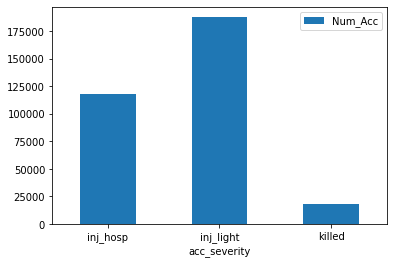

In [12]:
acc_df.groupby(by=['acc_severity']).count()[['Num_Acc']].plot.bar(rot=0)

<AxesSubplot:>

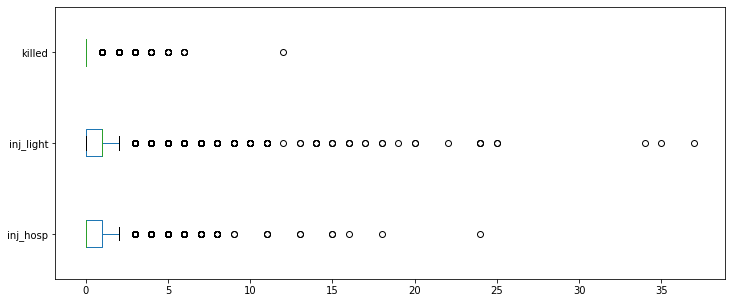

In [22]:
acc_df[['inj_hosp', 'inj_light', 'killed']].plot.box(vert=False, figsize=(12, 5))

#### Nb de victimes

In [14]:
acc_df[['victims_nb']].describe()

,victims_nb
count,323782.000000
mean,2.254872
std,1.231144
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,69.000000


#### Par année

<AxesSubplot:xlabel='year'>

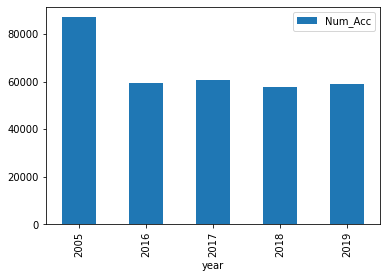

In [23]:
acc_df.groupby(by=['year']).count()[['Num_Acc']].plot.bar()

#### Par mois

<AxesSubplot:xlabel='month'>

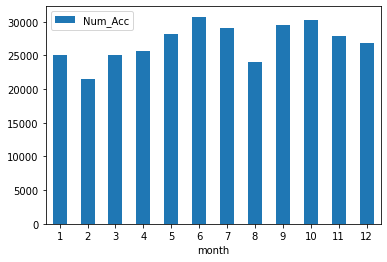

In [27]:
acc_df.groupby(by=['month']).count()[['Num_Acc']].plot.bar(rot=0)

#### Par jour de la semaine

<AxesSubplot:xlabel='weekday'>

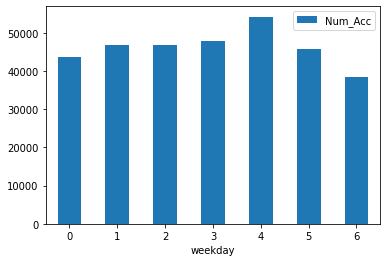

In [26]:
acc_df.groupby(by=['weekday']).count()[['Num_Acc']].plot.bar(rot=0)

#### Conditions atmosphériques

- -1 – Non renseigné
- 1 – Normale
- 2 – Pluie légère
- 3 – Pluie forte
- 4 – Neige - grêle
- 5 – Brouillard - fumée
- 6 – Vent fort - tempête
- 7 – Temps éblouissant
- 8 – Temps couvert
- 9 – Autre

<AxesSubplot:xlabel='atm'>

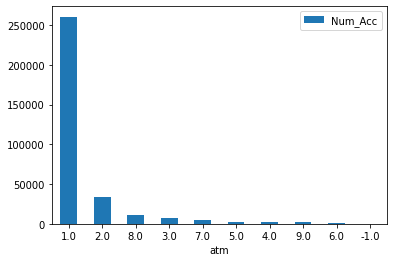

In [33]:
acc_df.groupby(by=['atm']).count().sort_values('Num_Acc', ascending=False)[['Num_Acc']].plot.bar(rot=0)

### Victimes

In [5]:
vic_df = utils.get_dataset(get_path_interim(Datasets.VICTIMS), 
                           dtypes=dtypes_featured(Datasets.VICTIMS, base_path='../'))
vic_df

/home/thomas/miniconda3/envs/securite-routiere/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
INFO:root:../data/interim/accidents/victims.csv: 730087 lines loaded (23.68)Mb


,Num_Acc,num_veh,place,catu,grav,sexe,an_nais,trajet,locp,actp,etatp,age
0,200500000001,A01,1.0,driver,inj_light,male,1976,home_work,0.0,0,0.0,29
1,200500000001,B02,1.0,driver,inj_hosp,female,1968,shopping,0.0,0,0.0,37
2,200500000001,B02,2.0,passenger,safe,male,1964,unknown,0.0,0,0.0,41
3,200500000001,B02,4.0,passenger,safe,male,2004,unknown,0.0,0,0.0,1
4,200500000001,B02,5.0,passenger,safe,male,1998,unknown,0.0,0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
730082,201600059431,A01,1.0,driver,inj_light,male,1994,unknown,0.0,0,0.0,22
730083,201600059431,B01,1.0,driver,inj_light,male,1990,unknown,0.0,0,0.0,26
730084,201600059432,A01,1.0,driver,inj_light,male,1967,shopping,0.0,0,0.0,49
730085,201600059432,A01,2.0,passenger,inj_light,male,1967,unknown,0.0,0,0.0,49


#### Répartition des ages

<AxesSubplot:ylabel='Frequency'>

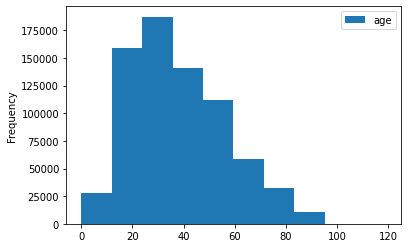

In [6]:
vic_df[['age']].plot.hist()

#### Par type de trajet

<AxesSubplot:xlabel='trajet'>

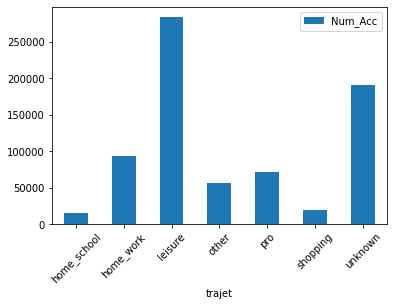

In [14]:
vic_df.groupby(by='trajet').count().reset_index()[['trajet', 'Num_Acc']].plot.bar('trajet', rot=45)

### Véhicules

In [17]:
veh_df = utils.get_dataset(get_path_interim(Datasets.VEHICLES),
                            dtypes=dtypes_featured(Datasets.VEHICLES, base_path='../'))
veh_df

INFO:root:Empty dtypes fond in ../resources/dtypes/featured.yml[vehicles]
INFO:root:../data/interim/accidents/vehicles.csv: 554820 lines loaded (38.10)Mb


,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
0,200500000001,0.0,7,0.0,0.0,2.0,1.0,1.0,A01
1,200500000001,0.0,7,0.0,0.0,2.0,8.0,10.0,B02
2,200500000002,0.0,7,0.0,0.0,2.0,7.0,16.0,A01
3,200500000002,0.0,2,0.0,0.0,2.0,1.0,1.0,B02
4,200500000003,0.0,2,0.0,0.0,2.0,1.0,1.0,A01
...,...,...,...,...,...,...,...,...,...
554815,201600059430,1.0,30,0.0,0.0,2.0,1.0,17.0,B01
554816,201600059431,2.0,30,0.0,0.0,2.0,7.0,15.0,A01
554817,201600059431,1.0,30,0.0,0.0,2.0,1.0,1.0,B01
554818,201600059432,1.0,2,0.0,0.0,2.0,7.0,1.0,A01


#### Types de chocs

Point de choc initial :

1 - Avant
2 – Avant droit
3 – Avant gauche
4 – Arrière
5 – Arrière droit
6 – Arrière gauche
7 – Côté droit
8 – Côté gauche
9 – Chocs multiples (tonneaux)

<AxesSubplot:xlabel='choc'>

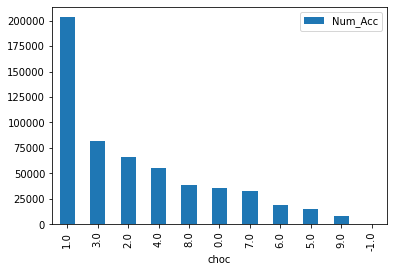

In [24]:
veh_df.groupby('choc').count().reset_index()[['Num_Acc', 'choc']]\
    .sort_values('Num_Acc', ascending=False).plot.bar('choc')

#### Obstacles heurté

abstacle fixe

1 – Véhicule en stationnement
2 – Arbre
3 – Glissière métallique
4 – Glissière béton
5 – Autre glissière
6 – Bâtiment, mur, pile de pont
7 – Support de signalisation verticale ou poste d’appel d’urgence
8 – Poteau
9 – Mobilier urbain
10 – Parapet
11 – Ilot, refuge, borne haute
12 – Bordure de trottoir
13 – Fossé, talus, paroi rocheuse
14 – Autre obstacle fixe sur chaussée
15 – Autre obstacle fixe sur trottoir ou accotement
16 – Sortie de chaussée sans obstacle


<AxesSubplot:xlabel='obs'>

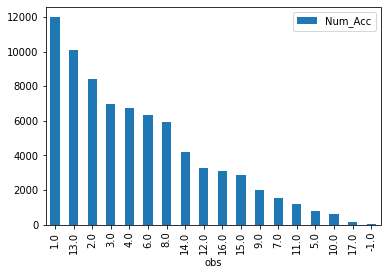

In [26]:
veh_obs = veh_df.groupby('obs').count().reset_index()[['Num_Acc', 'obs']]

veh_obs.loc[veh_obs['obs'] != .0, :]\
    .sort_values('Num_Acc', ascending=False).plot.bar('obs')

Obstacle mobile heurté :
1 – Piéton
2 – Véhicule
4 – Véhicule sur rail
5 – Animal domestique
6 – Animal sauvage
9 – Autre


<AxesSubplot:xlabel='obsm'>

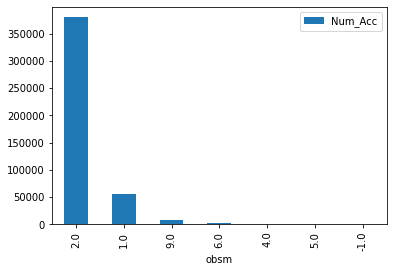

In [30]:
veh_obs = veh_df.groupby('obsm').count().reset_index()[['Num_Acc', 'obsm']]

veh_obs.loc[veh_obs['obsm'] != .0, :]\
    .sort_values('Num_Acc', ascending=False).plot.bar('obsm')

#### Manoeuvre avant l'accident

Manœuvre principale avant l’accident :
1 – Sans changement de direction
2 – Même sens, même file
3 – Entre 2 files
4 – En marche arrière
5 – A contresens
6 – En franchissant le terre-plein central
7 – Dans le couloir bus, dans le même sens
8 – Dans le couloir bus, dans le sens inverse
9 – En s’insérant
10 – En faisant demi-tour sur la chaussée
Changeant de file
11 – A gauche
12 – A droite
Déporté
13 – A gauche
14 – A droite
Tournant
15 – A gauche
16 – A droite
Dépassant
17 – A gauche
18 – A droite
Divers
19 – Traversant la chaussée
20 – Manœuvre de stationnement
21 – Manœuvre d’évitement
22 – Ouverture de porte
23 – Arrêté (hors stationnement)
24 – En stationnement (avec occupants)


<AxesSubplot:xlabel='manv'>

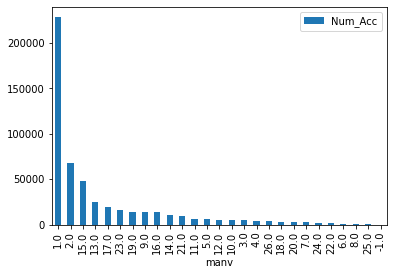

In [31]:
veh_obs = veh_df.groupby('manv').count().reset_index()[['Num_Acc', 'manv']]

veh_obs.loc[veh_obs['manv'] != .0, :]\
    .sort_values('Num_Acc', ascending=False).plot.bar('manv')